In [2]:
#Import semua library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # Import seaborn

from sklearn.model_selection import train_test_split, cross_val_score # Import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression # Import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)

In [3]:
# menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/STT NF/Semester 3/Machine Learning/Praktikum Mandiri/Praktikum Mandiri 4/data/calonpembelimobil.csv')
df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [5]:
df.describe(
)

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,500.500000,43.532000,1.469000,0.481000,0.95200,270.09000,0.633000
std,288.819436,12.672078,1.073402,0.499889,0.80146,95.23681,0.482228
min,1.000000,24.000000,0.000000,0.000000,0.00000,95.00000,0.000000
25%,250.750000,33.000000,1.000000,0.000000,0.00000,187.00000,0.000000
50%,500.500000,43.000000,1.000000,0.000000,1.00000,258.50000,1.000000
75%,750.250000,53.000000,2.000000,1.000000,2.00000,352.25000,1.000000
max,1000.000000,164.000000,3.000000,1.000000,4.00000,490.00000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [7]:
# Cek Missing Value
df.isnull().sum()

,0
ID,0
Usia,0
Status,0
Kelamin,0
Memiliki_Mobil,0
Penghasilan,0
Beli_Mobil,0


In [8]:
print("\nNilai unik di kolom 'Status':", df['Status'].unique())
print("Nilai unik di kolom 'Kelamin':", df['Kelamin'].unique())
print("Nilai unik di kolom 'Memiliki_Mobil':", df['Memiliki_Mobil'].unique())
print("Nilai unik di kolom 'Beli_Mobil':", df['Beli_Mobil'].unique())


Nilai unik di kolom 'Status': [1 2 3 0]
Nilai unik di kolom 'Kelamin': [0 1]
Nilai unik di kolom 'Memiliki_Mobil': [0 1 2 4 3]
Nilai unik di kolom 'Beli_Mobil': [1 0]


In [9]:
df['Status'].unique()

array([1, 2, 3, 0])

In [10]:
df['Kelamin'].unique()

array([0, 1])

In [12]:
print(df.head())
print(df.columns)

   ID  Usia  Status  Kelamin  Memiliki_Mobil  Penghasilan  Beli_Mobil
0   1    32       1        0               0          240           1
1   2    49       2        1               1          100           0
2   3    52       1        0               2          250           1
3   4    26       2        1               1          130           0
4   5    45       3        0               2          237           1
Index(['ID', 'Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan',
       'Beli_Mobil'],
      dtype='object')


In [13]:
# Hitung distribusi target
print("\nDistribusi Beli_Mobil:\n", df['Beli_Mobil'].value_counts())


Distribusi Beli_Mobil:
 Beli_Mobil
1    633
0    367
Name: count, dtype: int64


In [14]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
ID,1.000000,0.149779,-0.006634,0.014646,0.068555,0.254177,0.168614
Usia,0.149779,1.000000,0.051476,0.019454,0.090926,0.125859,0.100127
Status,-0.006634,0.051476,1.000000,-0.008561,0.048302,0.071714,0.048584
Kelamin,0.014646,0.019454,-0.008561,1.000000,0.035199,-0.054211,-0.147301
Memiliki_Mobil,0.068555,0.090926,0.048302,0.035199,1.000000,0.137823,0.102005
Penghasilan,0.254177,0.125859,0.071714,-0.054211,0.137823,1.000000,0.763930
Beli_Mobil,0.168614,0.100127,0.048584,-0.147301,0.102005,0.763930,1.000000


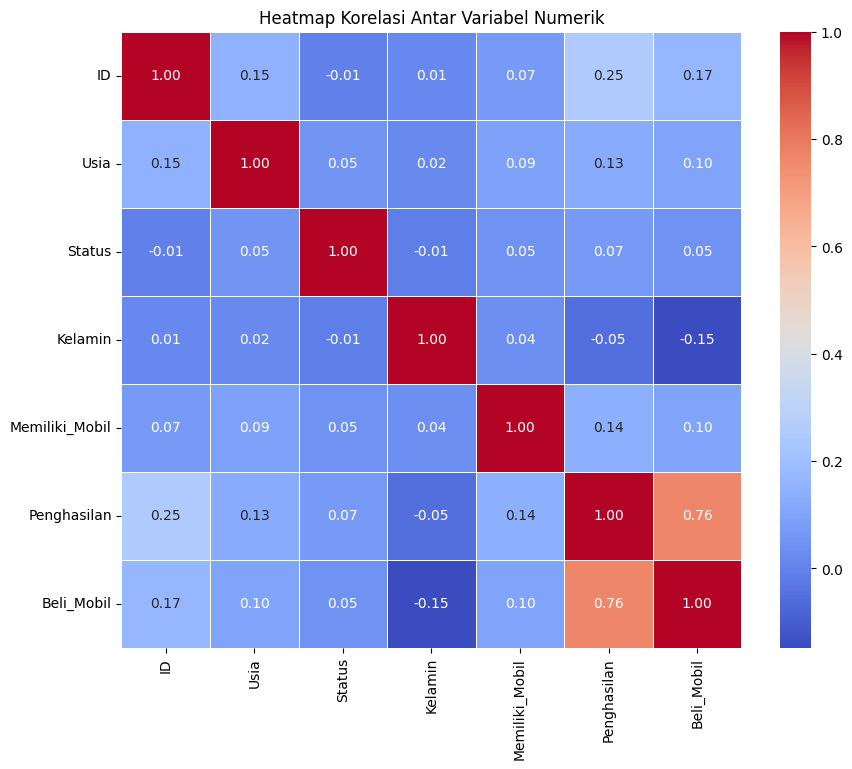

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel Numerik', fontsize=12)
plt.show()

In [16]:
feature_num = ['Usia', 'Penghasilan', 'Status', 'Kelamin', 'Memiliki_Mobil']
target_col = 'Beli_Mobil'

df_model = df[feature_num + [target_col]].dropna().copy()

x = df_model[feature_num]
y = df_model[target_col]

print("\nX shape:", x.shape)
print("Y shape:", y.shape)


X shape: (1000, 5)
Y shape: (1000,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nData latih:", X_train.shape)
print("Data uji:", X_test.shape)


Data latih: (800, 5)
Data uji: (200, 5)


In [18]:
# Scaling semua fitur karena semuanya numerik, tetapi perlu distandardisasi.
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), feature_num)
    ],
    remainder='drop'
)

# Menggunakan class_weight='balanced' karena data target mungkin tidak seimbang (meskipun di sini tampaknya cukup seimbang 50/50).
model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    class_weight='balanced',
    random_state=42
)

clf = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('model', model)
])

# Latih Model
clf.fit(X_train, y_train)
print("\nModel Logistic Regression berhasil dilatih.")


Model Logistic Regression berhasil dilatih.


In [19]:
# Prediksi & probabilitas
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Hitung metrik
print("\nMetrik Evaluasi Model:")
print(f"Akurasi : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision : {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred, zero_division=0):.4f}")
print(f"ROC-AUC : {roc_auc_score(y_test, y_prob):.4f}")


Metrik Evaluasi Model:
Akurasi : 0.9300
Precision : 0.9829
Recall: 0.9055
F1-Score: 0.9426
ROC-AUC : 0.9768


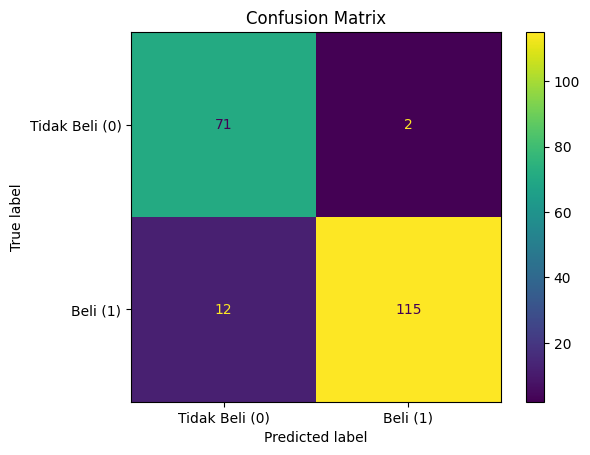

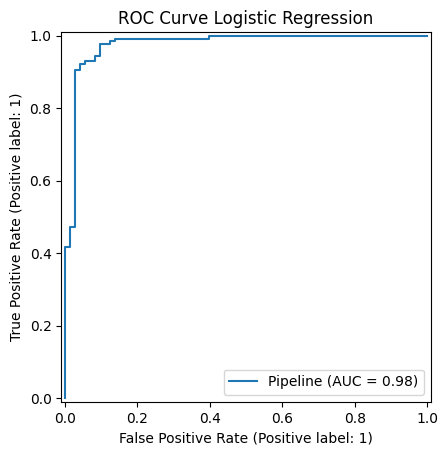

In [20]:
# Confusion Matrix
ConfusionMatrixDisplay (confusion_matrix(y_test, y_pred),
    display_labels=['Tidak Beli (0)', 'Beli (1)']
    ).plot(values_format='d')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator (clf, X_test, y_test)
plt.title("ROC Curve Logistic Regression")
plt.show()

In [21]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Tidak Beli (0)', 'Beli (1)']))


Classification Report:
                precision    recall  f1-score   support

Tidak Beli (0)       0.86      0.97      0.91        73
      Beli (1)       0.98      0.91      0.94       127

      accuracy                           0.93       200
     macro avg       0.92      0.94      0.93       200
  weighted avg       0.94      0.93      0.93       200



In [22]:
# Lakukan cross validation (cv=5 berarti 5-fold)
scores = cross_val_score(clf, x, y, cv=5, scoring='accuracy')

# Tampilkan Hasil
print("\nHasil Cross Validation (Akurasi):")
print("Skor tiap fold:", scores)
print("Rata-rata akurasi:", np.mean(scores))
print("Standar deviasi:", np.std(scores))


Hasil Cross Validation (Akurasi):
Skor tiap fold: [0.78  0.925 0.955 0.945 0.94 ]
Rata-rata akurasi: 0.909
Standar deviasi: 0.06522269543648128


In [23]:
# Ambil nama fitur & koefisien
# Koefisien diambil dari model setelah proses scaling
scaled_features = clf.named_steps['preprocess'].get_feature_names_out()
coefs = clf.named_steps['model'].coef_[0]
odds = np.exp(coefs)

coef_df = pd.DataFrame({
    'Fitur': scaled_features,
    'Koefisien (log-odds)': coefs,
    'Odds Ratio (e^coef)': odds
}).sort_values('Odds Ratio (e^coef)', ascending=False)

# Rename kolom agar lebih rapih setelah scaling
coef_df['Fitur'] = coef_df['Fitur'].str.replace('num__', '')
display(coef_df)

,Fitur,Koefisien (log-odds),Odds Ratio (e^coef)
1,Penghasilan,4.568333,96.383273
4,Memiliki_Mobil,0.078968,1.082169
0,Usia,-0.045073,0.955928
2,Status,-0.132093,0.876259
3,Kelamin,-0.596863,0.550536


In [24]:
# Contoh 2 calon pembeli
data_baru = pd.DataFrame({
    'Usia': [55, 25],
    'Penghasilan': [350, 100],
    'Status': [2, 0], # 2=Menikah, 0=Belum Menikah
    'Kelamin': [0, 1], # 0=Perempuan, 1=Laki-Laki
    'Memiliki_Mobil': [2, 0] # Jumlah mobil yang dimiliki
})

pred = clf.predict(data_baru)
prob = clf.predict_proba(data_baru)[:,1]

hasil = data_baru.copy()
hasil['Prob_Beli_Mobil'] = prob
hasil['Pred (0=Tidak,1=Ya)'] = pred
display(hasil)

print("\nAnalisis Selesai.")

,Usia,Penghasilan,Status,Kelamin,Memiliki_Mobil,Prob_Beli_Mobil,"Pred (0=Tidak,1=Ya)"
0,55,350,2,0,2,0.998183,1
1,25,100,0,1,0,0.001118,0



Analisis Selesai.
